<a href="https://colab.research.google.com/github/kibrus/Emotion-detector/blob/main/CNN_Emotion_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Setup and load data

1.1 Install Dependencies and setups

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

Extracting the zip file

In [3]:
import zipfile
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Define the folder where your zip files are located in Google Drive
zip_folder_path = '/content/drive/MyDrive/Data/Imageclassification'

# Step 3: List of zip files to extract
zip_files = ['happy.zip', 'sad.zip']

# Step 4: Loop through each zip file and extract it to a corresponding folder
for zip_file in zip_files:
    # Full path to the zip file
    zip_path = os.path.join(zip_folder_path, zip_file)

    # Destination folder (based on the zip file name, e.g., 'happy' or 'sad')
    extract_to_path = os.path.join('/content/data', zip_file.split('.')[0])

    # Check if the file exists before extracting
    if os.path.exists(zip_path):
        # Create the destination folder if it doesn't exist
        if not os.path.exists(extract_to_path):
            os.makedirs(extract_to_path)

        # Extract the zip file into the corresponding folder
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_path)  # Extract into the specified folder
        print(f"Files from {zip_file} extracted successfully to {extract_to_path}")
    else:
        print(f"File not found: {zip_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files from happy.zip extracted successfully to /content/data/happy
Files from sad.zip extracted successfully to /content/data/sad


In [4]:
!ls /content/drive/MyDrive/Data/Imageclassification

happy.zip  sad.zip


1.2 Remove dodgy images

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg', 'gif', 'bmp', 'png']

In [8]:
# Iterate through all files in the dataset and remove invalid images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            # Try to read the image using OpenCV
            img = cv2.imread(image_path)

            # Check if it's a valid image file using imghdr
            tip = imghdr.what(image_path)

            # If the image type is not in the allowed extensions, remove the file
            if tip not in image_exts:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with Image {image_path}: {e}")

Image not in ext list data/happy/traitshappypeople.jpg
Image not in ext list data/happy/smiling-woman_W6GFOSFAXA.jpg
Image not in ext list data/happy/guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list data/happy/smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in ext list data/happy/group-happy-smiling-people-chat-260nw-2299728955.jpg
Image not in ext list data/happy/handsome-happy-african-american-bearded-260nw-2460702995.jpg
Image not in ext list data/happy/businesswoman-giving-high-five-male-260nw-2226244055.jpg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/sad/depositphotos_36254119-stock-photo-desperate-sad-people.jpg
Image not in ext list data/sad/sad-person-pictures-1920-x-1110-ycv2h9n0pk9g5x7e.jpg
Image not in ext list data/sad/sad-man-260nw-82004164.jpg
Image not in ext list data/sad/1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-ma

1.3 Load Data

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
#building data pipe line
data = tf.keras.utils.image_dataset_from_directory('data')

Found 381 files belonging to 2 classes.


In [11]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Since the data file is not loaded into memory, we need to use the numpy_iterator to access the data.

In [12]:
#alowing as to loop through it
data_iterator = data.as_numpy_iterator()

In [13]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x78a9593e3760>)

In [14]:
#grabing one batch back
batch = data_iterator.next()
batch

(array([[[[229.       , 232.       , 237.       ],
          [229.       , 232.       , 237.       ],
          [230.       , 233.       , 238.       ],
          ...,
          [192.42969  , 199.42969  , 218.42969  ],
          [195.       , 202.       , 220.       ],
          [195.       , 202.       , 220.       ]],
 
         [[229.       , 232.       , 237.       ],
          [229.       , 232.       , 237.       ],
          [230.       , 233.       , 238.       ],
          ...,
          [193.69788  , 200.69788  , 219.69788  ],
          [194.39062  , 202.60938  , 220.       ],
          [194.39062  , 202.60938  , 220.       ]],
 
         [[229.       , 232.       , 237.       ],
          [229.       , 232.       , 237.       ],
          [230.       , 233.       , 238.       ],
          ...,
          [193.96875  , 200.96875  , 219.96875  ],
          [191.96875  , 199.96875  , 218.96875  ],
          [191.96875  , 199.96875  , 218.96875  ]],
 
         ...,
 
         [[1

In [15]:
#batch have 2 parts or length. The first part is images and labels
len(batch)

2

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
#lable
batch[1]

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int32)

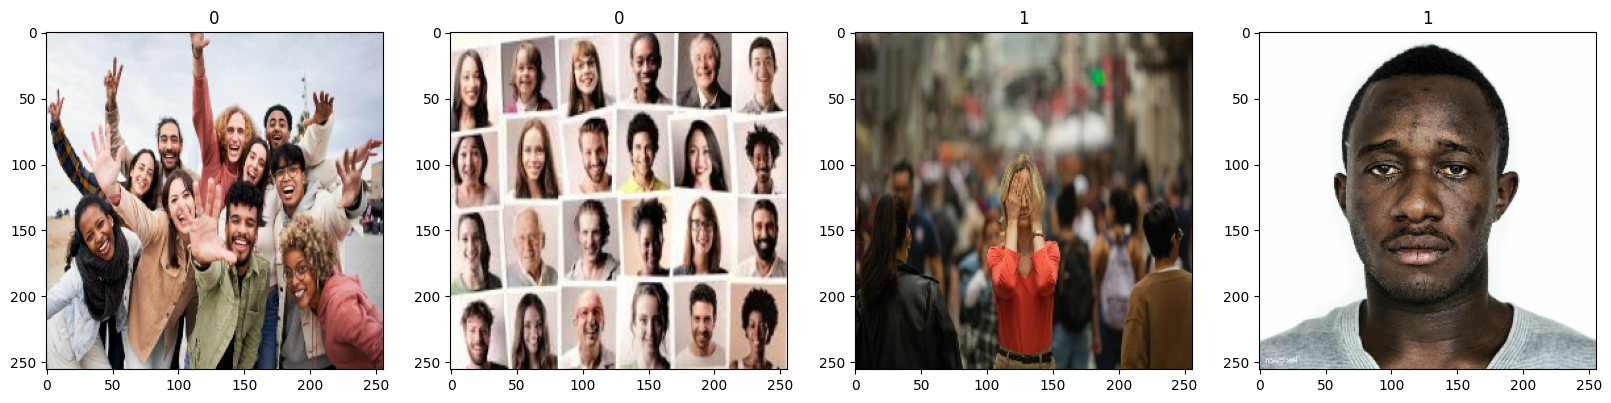

In [18]:
#check labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# sad - 1,  happy - 0

#2, preprocess Dat

2.1 Scale Data

In [19]:
data = data.map(lambda x, y: (x/255, y))

In [20]:
for x_batch, y_batch in data.take(1):
    # Print the pixel values of the first image in the batch
    print("First image pixel values:", x_batch[0].numpy())  # Convert to numpy for easy viewing
    print("First image label:", y_batch[0].numpy())

First image pixel values: [[[0.99662226 0.9887791  0.9927007 ]
  [0.978102   0.9601256  0.980936  ]
  [0.97779566 0.95407474 0.9795037 ]
  ...
  [0.9887408  0.98089767 1.        ]
  [0.9831112  0.9758119  1.        ]
  [0.9776348  0.9737132  0.99720436]]

 [[0.96528196 0.9574388  0.9631833 ]
  [0.85901964 0.84104323 0.8621064 ]
  [0.86204046 0.83626163 0.86426294]
  ...
  [0.90388614 0.896043   0.9207316 ]
  [0.89810526 0.89080596 0.91901904]
  [0.9693783  0.9654567  0.98948014]]

 [[0.89944106 0.8915979  0.90117204]
  [0.60884655 0.59087014 0.6124643 ]
  [0.6188572  0.58875513 0.62216055]
  ...
  [0.72562015 0.717777   0.75420135]
  [0.71952134 0.712222   0.74889106]
  [0.95203257 0.948111   0.97325265]]

 ...

 [[0.9341815  0.9255269  0.9423361 ]
  [0.6412318  0.62961894 0.6672874 ]
  [0.6647649  0.65079206 0.6942587 ]
  ...
  [0.88621986 0.78040195 0.71050745]
  [0.85283583 0.7694962  0.7351263 ]
  [0.9878282  0.9490981  0.94240385]]

 [[0.96280676 0.95470184 0.97340715]
  [0.868804

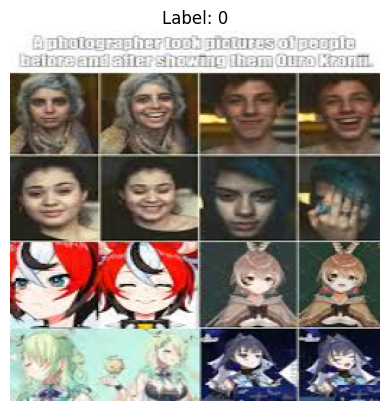

In [21]:
import matplotlib.pyplot as plt

# Shuffle the dataset to pick a random sample
shuffled_data = data.shuffle(buffer_size=1000)

# Take one random sample
for x_batch, y_batch in shuffled_data.take(1):
    random_index = tf.random.uniform(shape=[], minval=0, maxval=x_batch.shape[0], dtype=tf.int32)

    # Get the random image and its label
    random_image = x_batch[random_index].numpy()
    random_label = y_batch[random_index].numpy()

    # Plot the random image
    plt.imshow(random_image)
    plt.title(f"Label: {random_label}")
    plt.axis('off')  # Hide axis
    plt.show()

In [22]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

In [24]:
batch[0]

array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00]],

        [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         ...,
         [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
         [

2.2 Split Data

In [25]:
#number of batch
len(data)

12

In [26]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [27]:
train_size + val_size + test_size == len(data)

True

In [28]:
#split out data
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

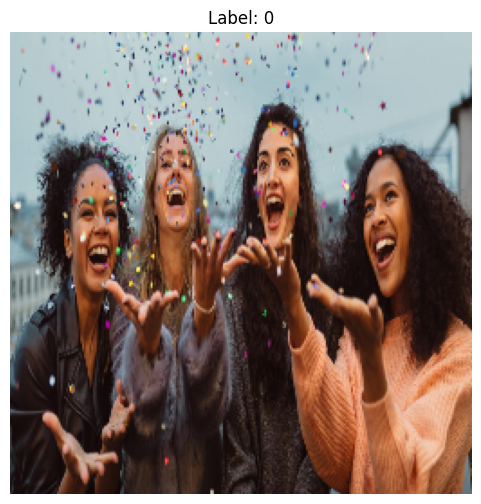

In [30]:
#plot random image
import numpy as np
import matplotlib.pyplot as plt

# Convert the dataset to a list to easily access the images
# Note: This might be inefficient if your dataset is very large, consider using batching.
images, labels = next(iter(train))

# Select a random index
random_index = np.random.randint(0, images.shape[0])

# Get the random image and label
random_image = images[random_index].numpy()
random_label = labels[random_index].numpy()

# Plot the random image
plt.figure(figsize=(6, 6))
plt.imshow(random_image)
plt.title(f'Label: {random_label}')
plt.axis('off')  # Hide axes
plt.show()

#3, Deep model

3.1 Build Deep Learning Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dense(256, activation='relu'),

    Dense(1, activation='sigmoid')  # For binary classification
])

# model_2=Sequential([
#     Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)),
#     MaxPooling2D(),

#     Conv2D(32, (3,3), 1, activation='relu'),
#     MaxPooling2D(),

#     Conv2D(16, (3,3), 1, activation='relu'),
#     MaxPooling2D(),

#     Flatten(),

#     Dense(256, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# from tensorflow.keras.regularizers import l2  # Import l2 for L2 regularization

# # Define the regularization strength (lambda)
# l2_reg = 0.01  # You can adjust this value as needed

# # Model definition with L2 regularization
# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(l2_reg)),
#     MaxPooling2D(),

#     Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
#     MaxPooling2D(),

#     Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(l2_reg)),
#     MaxPooling2D(),

#     Flatten(),

#     Dense(256, activation='relu', kernel_regularizer=l2(l2_reg)),
#     Dense(1, activation='sigmoid', kernel_regularizer=l2(l2_reg))  # For binary classification
# ])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,680,929 (6.41 MB)

 Trainable params: 1,680,929 (6.41 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [35]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau # Import EarlyStopping and ReduceLROnPlateau
# Callbacks
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [36]:
# Training
history = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback, early_stopping])

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 761ms/step - accuracy: 0.4717 - loss: 0.8737 - val_accuracy: 0.4896 - val_loss: 0.6940
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5552 - loss: 0.6914 - val_accuracy: 0.5208 - val_loss: 0.6884
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 945ms/step - accuracy: 0.5643 - loss: 0.6897 - val_accuracy: 0.5208 - val_loss: 0.6867
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - accuracy: 0.5320 - loss: 0.6865 - val_accuracy: 0.5208 - val_loss: 0.6730
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.4935 - loss: 0.6715 - val_accuracy: 0.4896 - val_loss: 0.6394
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 722ms/step - accuracy: 0.5683 - loss: 0.5989 - val_accuracy: 0.6771 - val_loss: 0.5839
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.6567 - loss: 0.5861 - val_accuracy: 0.6667 - val_loss: 0.5796
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.6319 - loss: 0.6236 - val_accuracy: 0.6979 - val_loss: 0

After balancing the number of happy and sad data, the model generalized perfectly.

# 3.3 Plot performance

In [37]:
def Plot_loss_accuracy(history):
  fig = plt.figure()
  plt.plot(history.history['loss'], color = 'teal' , label='loss')
  plt.plot(history.history['val_loss'], color = 'orange' , label='val_loss')
  fig.suptitle('Loss', fontsize=25)
  plt.legend(loc='upper left')
  plt.show()

  fig = plt.figure()
  plt.plot(history.history['accuracy'], color = 'teal' , label='loss')
  plt.plot(history.history['val_accuracy'], color = 'orange' , label='val_loss')
  fig.suptitle('accuracy', fontsize=25)
  plt.legend(loc='upper left')
  plt.show()

3.3.1 Plot performance of model 1

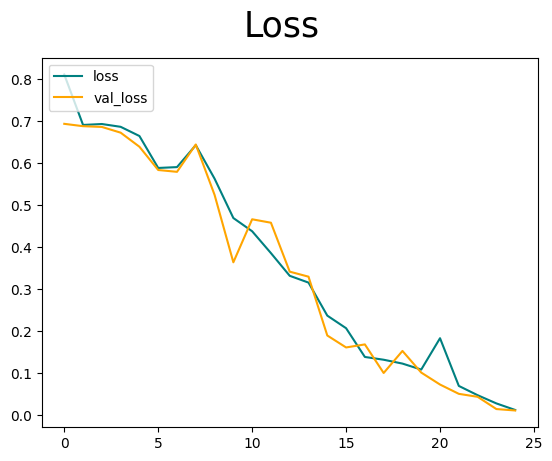

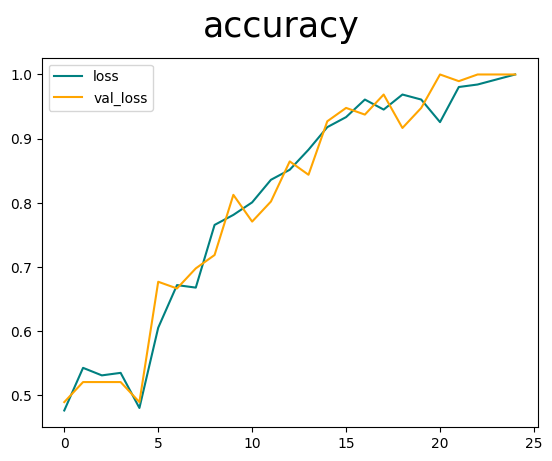

In [38]:
Plot_loss_accuracy(history)

# 4, Evaluate performance

4.1 Evaluate

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


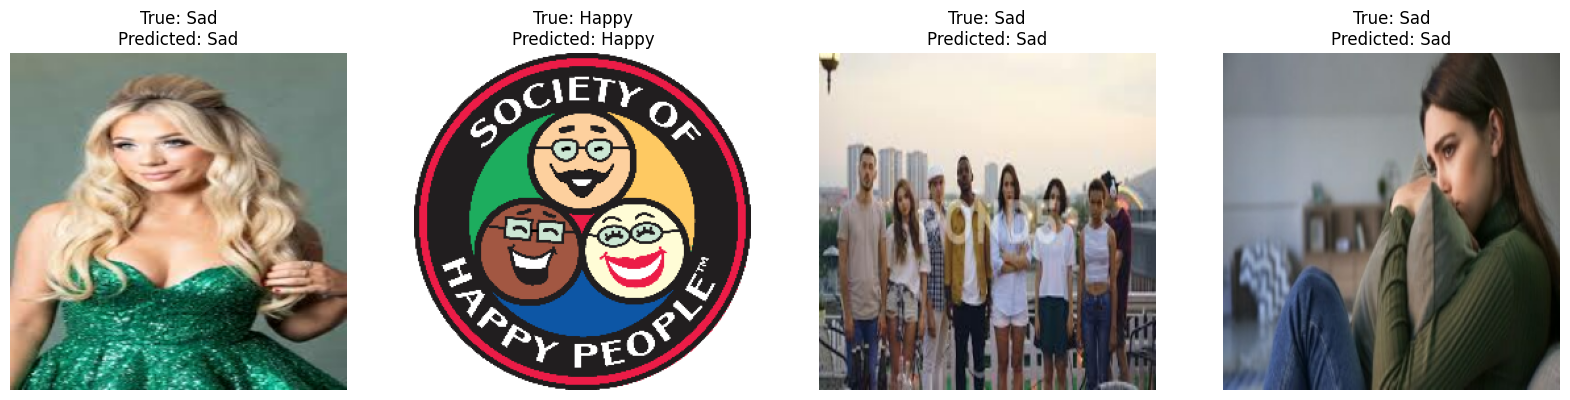

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


In [39]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

# Initialize metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

# Function to evaluate the model and display images with predictions and true labels
def evaluate(model, test):
    for batch in test.as_numpy_iterator():
        X, y = batch  # X is the image batch, y is the true labels
        yhat = model.predict(X)  # Predicted labels

        # Update the metrics
        pre.update_state(y, yhat)
        re.update_state(y, yhat)
        acc.update_state(y, yhat)

        # Display random images from the batch
        fig, axes = plt.subplots(ncols=4, figsize=(20, 20))

        for idx in range(4):
            img = (X[idx] * 255).astype(int)  # Rescale the image for display
            ax = axes[idx]
            ax.imshow(img)

            # Display true and predicted labels
            true_label = 'Happy' if y[idx] == 0 else 'Sad'
            predicted_label = 'Happy' if yhat[idx] < 0.5 else 'Sad'
            ax.title.set_text(f"True: {true_label}\nPredicted: {predicted_label}")
            ax.axis('off')  # Hide the axis

        plt.show()  # Show the plot with images

    # Print precision, recall, and accuracy after processing all batches
    print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

# Call the evaluation function
evaluate(model, test)

#Test

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 694ms/step


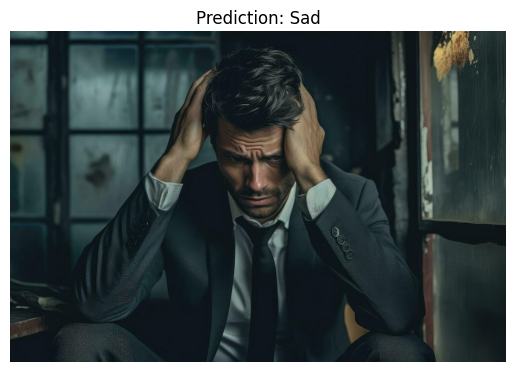

Raw model output: 0.9999927282333374


In [42]:
# Function to load and preprocess the image
def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)

    # Convert the image from BGR (OpenCV format) to RGB (for proper color display)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize the image to (256, 256)
    resized_img = tf.image.resize(img_rgb, (256, 256))

    # Normalize the image (scaling pixel values to [0, 1])
    resized_img = resized_img / 255.0

    # Expand dimensions to match the input shape expected by the model (1, 256, 256, 3)
    expanded_img = np.expand_dims(resized_img, axis=0)

    return expanded_img, img_rgb  # Return both resized and original image for display

# Function to predict whether the image is "Happy" or "Sad"
def predict_emotion(model, image_path):
    # Preprocess the image
    processed_img, original_img = preprocess_image(image_path)

    # Make a prediction using the model
    prediction = model.predict(processed_img)

    # Convert prediction to label
    label = "Happy" if prediction < 0.5 else "Sad"

    # Display the image and the prediction result
    plt.imshow(original_img)
    plt.title(f"Prediction: {label}")
    plt.axis('off')  # Hide the axis
    plt.show()

    # Print the raw prediction value (probability)
    print(f"Raw model output: {prediction[0][0]}")

# Example usage:
# Pass the path to your image file here
image_path = '/content/business-man-stressed.jpeg'  # Replace with the path to your test image
predict_emotion(model, image_path)


In [43]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models', "happysadmodel_1.h5"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


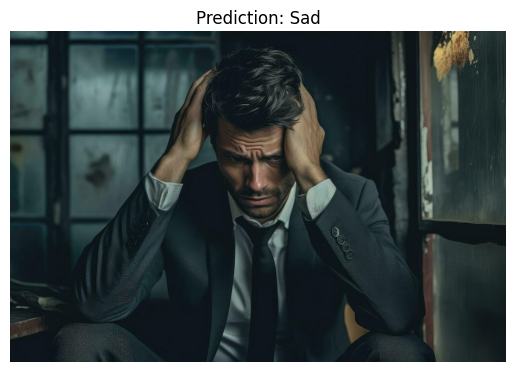

Raw model output: 0.9999927282333374


In [44]:
new_model = load_model(os.path.join('models', "happysadmodel_1.h5"))
image_path = '/content/business-man-stressed.jpeg'  # Replace with the path to your test image
predict_emotion(new_model, image_path)